# LASSO REGRESSION IMPLEMENTATION

## `COORDINATE DESCENT ALGORITHM`
### `Normalized features version`
### $w = 0$
### $for j = 0,1,...,D:$
### $p_{j}= \sum \limits _{i=1} ^N x_{j}^{(i)}(y^{(i)} - \hat y_{pred}^{(i)} + w_{j}x_{j}^{(i)})$
$ \hat w_{j} = \left\{
        \begin{array}\\
            (p_{j} + \lambda) & \mbox{if} \ p_{j} < - \lambda/2 \\
            0 & \mbox{if} \ p_{j} \ in \ [- \lambda/2, \lambda/2] \\
            (p_{j}-\lambda) & \mbox{if} \ p_{j} > \lambda/2
         \end{array}
    \right.
$

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
class LassoRegression:
    '''Coordinate descent for lasso regression - normalized data version'''
    
    def __init__(self, data, features, target, l1=.01, n_rounds=100, verbose=False):
        X,y = self.__prepare_data_for_training(data, features, target)
        (X, self.norms) = self.__normalize_features(X)
        
        self.features_names = features
        self.weights = np.zeros(X.shape[1])
        
        self.__coordinate_descent_lasso(X, y, self.weights, l1, n_rounds, verbose)
        
    def __coordinate_descent_lasso(self, X, y, w, lamda, n_rounds, verbose):
        m,n = X.shape
        
        for i in range(n_rounds):            
            
            # Looping through each coordinate
            for j in range(n):
                X_j = X[:, j]
                y_pred = X @ w
                rho = X_j @ (y - y_pred + w[j] * X_j)
                
                # Do not penalize intercept
                if(j == 0):
                    w[j] = rho
                else:
                    w[j] = self.__soft_threshold(rho, lamda)
                    
        # Save learned weights
        self.weights = w
        if(verbose):
            print("Lasso Regression Training Finished")
            print("Training MSE:", self.__calculate_MSE(X, y, w))      
    
    def __normalize_features(self, X):
        norms = np.linalg.norm(X, axis=0)
        normalized_features = X / norms
        return (normalized_features, norms)      
    
    def __prepare_data_for_training(self, data, features, target):
        X = data[features]
        y = data[target]
        X = np.append(np.ones((len(X), 1)), X, axis=1)
        return(X, y)

    def __soft_threshold(self, rho, lamda):
        '''Soft threshold function used for normalized data and lasso regression'''
        if rho < - lamda:
            return (rho + lamda)
        elif rho >  lamda:
            return (rho - lamda)
        else: 
            return 0
     
    def __calculate_MSE(self, X, y, w):
        '''Mean Square Error'''
        m = y.shape[0]
        return np.sum((y - X @ w)**2) / m
    
    def get_weights(self):
        return self.weights
    
    def coefficients(self):
        features = ["intercept"] + self.features_names;
        return pd.DataFrame({"features": features, "coefficients": self.weights})
        
    def predict(self, X):
        X = np.array(X)
        n = len(X)
        X = np.append(np.ones((n,1)), X, axis=1)
        return X @ (self.weights / self.norms)

## Load Data

In [3]:
sales_data = pd.read_csv("./data/house_data.csv")
train = sales_data.sample(frac=0.7, random_state=0) 
test = sales_data.drop(train.index)

In [4]:
sales_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Train Lasso Regression Model

In [5]:
all_features = ['bedrooms',
                'bathrooms',
                'sqft_living',
                'sqft_lot',
                'floors',
                'waterfront', 
                'view', 
                'condition', 
                'grade',
                'sqft_above',
                'sqft_basement',
                'yr_built', 
                'yr_renovated']

In [6]:
lasso_model = LassoRegression(sales_data,all_features, "price", 8.8e5, verbose=True)

Lasso Regression Training Finished
Training MSE: 57975450735.71516


In [7]:
lasso_model.coefficients()

,features,coefficients
0,intercept,1.146069e+06
1,bedrooms,0.000000e+00
2,bathrooms,0.000000e+00
3,sqft_living,7.466818e+07
4,sqft_lot,-6.154879e+05
5,floors,0.000000e+00
6,waterfront,6.574859e+06
7,view,8.561702e+06
8,condition,0.000000e+00
9,grade,2.410569e+07


## Coefficients path for different values of L1 regularization

(56.23413251903491,
 17782794.100389227,
 -110180609.18276471,
 117853268.31344414)

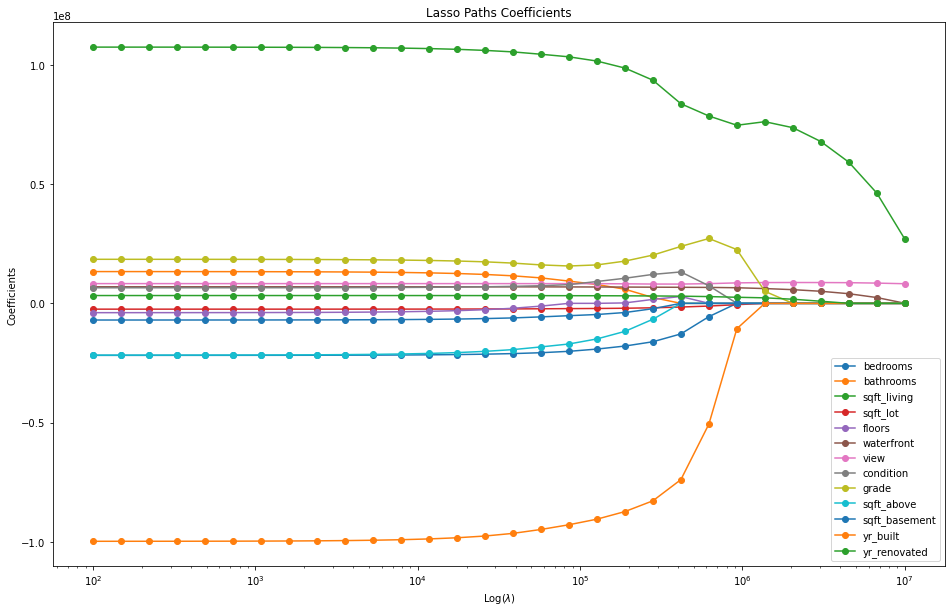

In [8]:
theta_list = list()
lamda = np.logspace(3,8, 30) / 10 
for l1 in lamda:
    m = LassoRegression(sales_data,all_features, "price", l1)
    theta_list.append(m.get_weights()[1:])
    
#Stack into numpy array
theta_lasso = np.stack(theta_list).T

n,_ = theta_lasso.shape
plt.figure(figsize = (16,10))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], 'o-', label = all_features[i],)
    
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths Coefficients')
plt.legend(prop={'size': 10})
plt.axis('tight')